This script reads the Nc file for Mosart Discharge downloaded from Casper log-in

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
#%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Where to save the figures
PROJECT_ROOT_DIR = "."  

path2Create = r'C:/rezaul/1.academic/1.research/2.project/mrb/output/'
 
if not os.path.exists(path2Create):
    os.makedirs(path2Create)    
    
path2Save = 'C:/rezaul/1.academic/1.research/2.project/mrb/output/fig/disch/'

if not os.path.exists(path2Save):
    os.makedirs(path2Save)    

IMAGES_PATH = os.path.join(path2Save)
outputPath = os.path.join(path2Save)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


## Import Libraries

In [2]:
# Common imports
import numpy as np
import pandas as pd
import os
import glob
from datetime import datetime
#from osgeo import gdal # Import the GDAL library
#import gdal

import cmocean

#import matplotlib.pyplot as plt # Import the Matplotlib package
from matplotlib import pyplot as plt  # Import the Matplotlib package
from numpy import linspace # Import the Linspace numpy library
from numpy import meshgrid # Import the Meshgrid numpy library

#from init import *
import scipy.io as sio
# Common imports
import calendar
import datetime
import matplotlib.dates as mdates
from numpy import array, ma
#import scipy.io
from scipy.io import loadmat   # https://scipy-cookbook.readthedocs.io/items/Reading_mat_files.html
import xarray as xr


In [3]:
# Stats
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import gamma, norm
from scipy.signal import detrend

from netCDF4 import Dataset   # http://code.google.com/p/netcdf4-python/
from numpy.random import normal
from numpy import hstack

import math


In [4]:
# Plotting
import matplotlib.colors as colors
from copy import copy
import matplotlib.cm as cm
#from matplotlib_scalebar.scalebar import ScaleBar

import seaborn as sns
import matplotlib.gridspec as gridspec


In [5]:
# Projection
import cartopy.crs as ccrs

import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from descartes import PolygonPatch
import shapefile as shp  # Requires the pyshp package


In [6]:
from descartes import PolygonPatch
import shapefile as shp  # Requires the pyshp package
sf=shp.Reader('C:/rezaul/1.academic/1.research/1.data/shapeFile/missi/Miss_RiverBasin.shp')

## Basin shape files

In [7]:
shapeFile_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/mississippi_1.shp'
shapeFile_Arkansas = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/arkansas_basin_1.shp'
shapeFile_Missouri = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/missouri_basin_1.shp'
shapeFile_Ohio = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/ohio_basin_1.shp'

In [8]:
sf_Missi = shp.Reader(shapeFile_Missi)
sf_Arkansas = shp.Reader(shapeFile_Arkansas)
sf_Missouri = shp.Reader(shapeFile_Missouri)
sf_Ohio = shp.Reader(shapeFile_Ohio)

In [9]:
reader_Missi = shpreader.Reader(shapeFile_Missi)
basin_Missi = list(reader_Missi.geometries())
#
reader_Arkansas = shpreader.Reader(shapeFile_Arkansas)
basin_Arkansas = list(reader_Arkansas.geometries())
#
reader_Missouri = shpreader.Reader(shapeFile_Missouri)
basin_Missouri = list(reader_Missouri.geometries())
#
reader_Ohio = shpreader.Reader(shapeFile_Ohio)
basin_Ohio = list(reader_Ohio.geometries())
#


In [10]:
feature_Missi = sf_Missi.shapeRecords()[0]
print(feature_Missi)

feature_Arkansas = sf_Arkansas.shapeRecords()[0]
print(feature_Arkansas)

feature_Missouri = sf_Missouri.shapeRecords()[0]
print(feature_Missouri)

feature_Ohio = sf_Ohio.shapeRecords()[0]
print(feature_Ohio)


## Read Nc file

In [11]:
filePath = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon'
fileName = 'b.e21.BHISTcmip6.f09_g17.LE2-1001.001.clm2.h0.QOVER.185001-185912.nc'
ncFile_param = str(filePath) + '/' + str(fileName)
print(ncFile_param)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon/b.e21.BHISTcmip6.f09_g17.LE2-1001.001.clm2.h0.QOVER.185001-185912.nc


In [12]:
file_param = Dataset(ncFile_param, mode='r')
file_param

lons = file_param.variables['lon'][:]
lats = file_param.variables['lat'][:]

In [13]:
print(lats[0:4])

[-90.       -89.057594 -88.11518  -87.172775]


In [14]:
print(lons[0:4])

[0.   1.25 2.5  3.75]


In [15]:
file_xr  = xr.open_dataset(ncFile_param) 
file_xr

C:\Users\muham\anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified procedure could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:       (levgrnd: 25, levlak: 10, levdcmp: 25, lon: 288, lat: 192,
                   time: 120, hist_interval: 2)
Coordinates:
  * levgrnd       (levgrnd) float32 0.01 0.04 0.09 0.16 ... 19.48 28.87 42.0
  * levlak        (levlak) float32 0.05 0.6 2.1 4.6 ... 18.6 25.6 34.33 44.78
  * levdcmp       (levdcmp) float32 0.01 0.04 0.09 0.16 ... 19.48 28.87 42.0
  * lon           (lon) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * lat           (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * time          (time) object 1850-02-01 00:00:00 ... 1860-01-01 00:00:00
Dimensions without coordinates: hist_interval
Data variables: (12/22)
    area          (lat, lon) float32 ...
    landfrac      (lat, lon) float32 ...
    landmask      (lat, lon) float64 ...
    pftmask       (lat, lon) float64 ...
    nbedrock      (lat, lon) float64 ...
    ZSOI          (levgrnd, lat, lon) float32 ...
    ...            ...
    mscur         (time) float64 ...
    nstep         (time) float64 ...
    time_bounds   (time, hist_interval) object ...
    date_written  (time) object ...
    time_written  (time) object ...
    QOVER         (time, lat, lon) float32 ...
Attributes: (12/100)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 01/31/20 16:34:57
    source:                                    Community Land Model CLM4.0
    hostname:                                  aleph
    ...                                        ...
    cft_irrigated_switchgrass:                 60
    cft_tropical_corn:                         61
    cft_irrigated_tropical_corn:               62
    cft_tropical_soybean:                      63
    cft_irrigated_tropical_soybean:            64
    time_period_freq:                          month_1

In [16]:
param_val = file_xr['QOVER']

print(param_val.shape)
print(param_val)

(120, 192, 288)
<xarray.DataArray 'QOVER' (time: 120, lat: 192, lon: 288)>
[6635520 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * time     (time) object 1850-02-01 00:00:00 ... 1860-01-01 00:00:00
Attributes:
    long_name:     surface runoff
    units:         mm/s
    cell_methods:  time: mean


In [17]:

file_paramHist = Dataset(ncFile_param, mode='r')
file_paramHist

lons = file_paramHist.variables['lon'][:]
lats = file_paramHist.variables['lat'][:]
times = file_paramHist.variables['time'][:]
ntim = times.shape[0]
print(ntim)

time = np.arange(ntim)
time

param_valHist = file_paramHist.variables['QOVER'][:]*86400*30   


print(param_valHist.shape)
print('')
    
    

120
(120, 192, 288)



## Setting US boundaries

In [18]:
# Save only U.S. 
latboundsUs = [ 25 , 55]
lonboundsUs = [230 , 300]


In [19]:
# latitude lower and upper index
latli = np.argmin( np.abs( lats - latboundsUs[0] ) )
latui = np.argmin( np.abs( lats - latboundsUs[1] ) ) 

# longitude lower and upper index
lonli = np.argmin( np.abs( lons - lonboundsUs[0] ) )
lonui = np.argmin( np.abs( lons - lonboundsUs[1] ) )  

In [20]:
print(latli, latui)


122 154


In [21]:
print(lonli, lonui)

184 240


In [22]:
param_val_sample_Us = param_val[:, latli:latui , lonli:lonui]
print(param_val_sample_Us.shape)

(120, 32, 56)


In [23]:
t,y_Us,x_Us = param_val_sample_Us.shape
print(y_Us)
print(x_Us)
print(t)

32
56
120


In [24]:
lats_Us = lats[latli:latui]
print(lats_Us)

[24.973822 25.916231 26.858639 27.801046 28.743456 29.685863 30.628273
 31.57068  32.51309  33.455498 34.397907 35.340313 36.282722 37.225132
 38.167538 39.109947 40.052357 40.994766 41.937172 42.87958  43.82199
 44.764397 45.706806 46.649216 47.59162  48.53403  49.47644  50.41885
 51.361256 52.303665 53.246075 54.18848 ]


In [25]:
lons_Us = lons[lonli:lonui]
print(lons_Us)

[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]


## Using data from Ensemble Members

### Lat Lon info from CESM2

In [26]:
file_LatUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/CESM2_FLOOD/sm/latsUsArr.npy'
latUs_cesm2 = np.load(file_LatUs)
print(latUs_cesm2.shape)
print(latUs_cesm2)

(32,)
[24.973822 25.916231 26.858639 27.801046 28.743456 29.685863 30.628273
 31.57068  32.51309  33.455498 34.397907 35.340313 36.282722 37.225132
 38.167538 39.109947 40.052357 40.994766 41.937172 42.87958  43.82199
 44.764397 45.706806 46.649216 47.59162  48.53403  49.47644  50.41885
 51.361256 52.303665 53.246075 54.18848 ]


In [27]:
file_LonUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/CESM2_FLOOD/sm/lonsUsArr.npy'
lonUs_cesm2 = np.load(file_LonUs)
print(lonUs_cesm2.shape)
print(lonUs_cesm2)

(56,)
[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]


### Hist Sel (1930-2014)

In [28]:
file_hist_ensMems = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon/monRunoffUsHistEnsMems.npy'
file_hist_ensMems_loaded = np.load(file_hist_ensMems)
print(file_hist_ensMems_loaded.shape)
maxVal = np.nanmax(file_hist_ensMems_loaded)
maxVal

(1980, 32, 56, 50)


9.999999616903162e+35

## Historical years and 3 time periods (i.e., Era) in Scenario years

In [29]:
nMonsPerYr = 12     
print(nMonsPerYr)

12


In [30]:
histYrSt = 1850
histYrSelSt = 1930

refPeriodYrSt = 1971
refPeriodYrEnd = 2000

scenYrSt = 2015
scenEraTwoYrSt = 2045
scenEraThreeYrSt = 2075

scenYrEnd = 2100
#

In [31]:
refPeriodStepSt = (histYrSelSt - histYrSt)*nMonsPerYr
print(refPeriodStepSt)

960


In [32]:
file_histSel_ensMems_loaded = file_hist_ensMems_loaded[refPeriodStepSt::, :, :, :]
print(file_histSel_ensMems_loaded.shape)

(1020, 32, 56, 50)


### Scen

In [33]:
file_scen_ensMems = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon/monRunoffUsScenEnsMems.npy'
file_scen_ensMems_loaded = np.load(file_scen_ensMems)
print(file_scen_ensMems_loaded.shape)
maxVal = np.nanmax(file_scen_ensMems_loaded)
maxVal

(1032, 32, 56, 50)


9.999999616903162e+35

## Concatenate two data arrays

In [34]:
print(file_histSel_ensMems_loaded.shape)
print(file_scen_ensMems_loaded.shape)


(1020, 32, 56, 50)
(1032, 32, 56, 50)


In [35]:
param_histSel_scen_ensMems_Us = np.concatenate((file_histSel_ensMems_loaded, file_scen_ensMems_loaded), axis=0)
print(param_histSel_scen_ensMems_Us.shape)

(2052, 32, 56, 50)


## Writing in an Xarray Data array

In [36]:
print(param_histSel_scen_ensMems_Us.shape)

(2052, 32, 56, 50)


In [37]:
t_histSel_scen, y_Us, x_Us, ens_size = param_histSel_scen_ensMems_Us.shape

print(t_histSel_scen)
print(y_Us)
print(x_Us)
print(ens_size)

2052
32
56
50


In [38]:
Month_steps = [x for x in range(t_histSel_scen)]
#print(Month_steps)


In [39]:
Ensembles = [x for x in range(ens_size)]
print(Ensembles)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [40]:
param_histSel_scen_ensMems_Us_xarray = xr.DataArray(param_histSel_scen_ensMems_Us, coords=[Month_steps, latUs_cesm2, lonUs_cesm2, Ensembles], dims=["Month_steps","Lat","Lon","Ensembles"])
print(param_histSel_scen_ensMems_Us_xarray.shape)
#print(param_histSel_scen_ensMems_Us_xarray)

(2052, 32, 56, 50)


## Masking files for the US Domain only

## Mississippi

In [41]:
MaskFile_Missi_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc'
print(MaskFile_Missi_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc


In [42]:
MaskFile_Missi = xr.open_dataset(MaskFile_Missi_to_load)['Mask']
print(MaskFile_Missi)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [43]:
param_masked_Missi = param_histSel_scen_ensMems_Us_xarray.where(MaskFile_Missi>0)
print(param_masked_Missi.shape)
#print(param_masked_Missi)

(2052, 32, 56, 50)


## Missouri

In [44]:
MaskFile_Missouri_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missouri_us_CESM_longThree.nc'
print(MaskFile_Missouri_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missouri_us_CESM_longThree.nc


In [45]:
MaskFile_Missouri = xr.open_dataset(MaskFile_Missouri_to_load)['Mask']
print(MaskFile_Missouri)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [46]:
param_masked_Missouri = param_histSel_scen_ensMems_Us_xarray.where(MaskFile_Missouri>0)
print(param_masked_Missouri.shape)
#print(param_masked_Missouri)

(2052, 32, 56, 50)


## Arkansas

In [47]:
MaskFile_Arkansas_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_arkansas_us_CESM_longThree.nc'
print(MaskFile_Arkansas_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_arkansas_us_CESM_longThree.nc


In [48]:
MaskFile_Arkansas = xr.open_dataset(MaskFile_Arkansas_to_load)['Mask']
print(MaskFile_Arkansas)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [49]:
param_masked_Arkansas = param_histSel_scen_ensMems_Us_xarray.where(MaskFile_Arkansas>0)
print(param_masked_Arkansas.shape)
#print(param_masked_Arkansas)

(2052, 32, 56, 50)


## Ohio

In [50]:
MaskFile_Ohio_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_ohio_us_CESM_longThree.nc'
print(MaskFile_Ohio_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_ohio_us_CESM_longThree.nc


In [51]:
MaskFile_Ohio = xr.open_dataset(MaskFile_Ohio_to_load)['Mask']
print(MaskFile_Ohio)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [52]:
param_masked_Ohio = param_histSel_scen_ensMems_Us_xarray.where(MaskFile_Ohio>0)
print(param_masked_Ohio.shape)
#print(param_masked_Ohio)

(2052, 32, 56, 50)


## Masking for Lower Mississippi Basin

In [53]:
print(param_histSel_scen_ensMems_Us_xarray.shape)

(2052, 32, 56, 50)


In [54]:
param_masked_lowMissi = param_histSel_scen_ensMems_Us_xarray.sel(Lat=slice(30.,37.), Lon = slice(268., 271.))
print(param_masked_lowMissi.shape)

(2052, 7, 2, 50)


In [55]:
param_masked_ensMean_lowMissi = np.nanmean(param_masked_lowMissi, axis = 3)
print(param_masked_ensMean_lowMissi.shape)

(2052, 7, 2)


In [56]:
param_masked_ensMean_basinAvg_lowMissi = np.nanmean(param_masked_ensMean_lowMissi, axis=(1,2))
print(param_masked_ensMean_basinAvg_lowMissi.shape)

(2052,)


## The masked rasters for different basins

In [57]:
print(param_masked_Missi.shape)
print(param_masked_Missouri.shape)
print(param_masked_Arkansas.shape)
print(param_masked_Ohio.shape)
print('')
print(param_masked_lowMissi.shape)

(2052, 32, 56, 50)
(2052, 32, 56, 50)
(2052, 32, 56, 50)
(2052, 32, 56, 50)

(2052, 7, 2, 50)


## Time series for basin-average Param value: Monthly resolution

In [58]:
param_masked_ensMem_basinAvg_Missi = np.nanmean(param_masked_Missi, axis=(1,2))
print(param_masked_ensMem_basinAvg_Missi.shape)

(2052, 50)


In [59]:
param_masked_ensMem_basinAvg_Missouri = np.nanmean(param_masked_Missouri, axis=(1,2))
print(param_masked_ensMem_basinAvg_Missouri.shape)

(2052, 50)


In [60]:
param_masked_ensMem_basinAvg_Arkansas = np.nanmean(param_masked_Arkansas, axis=(1,2))
print(param_masked_ensMem_basinAvg_Arkansas.shape)

(2052, 50)


In [61]:
param_masked_ensMem_basinAvg_Ohio = np.nanmean(param_masked_Ohio, axis=(1,2))
print(param_masked_ensMem_basinAvg_Ohio.shape)

(2052, 50)


In [62]:
param_masked_ensMem_basinAvg_lowMissi = np.nanmean(param_masked_lowMissi, axis=(1,2))
print(param_masked_ensMem_basinAvg_lowMissi.shape)

(2052, 50)


## Ensemble Mean

In [63]:
param_masked_ensMean_basinAvg_Missi = np.nanmean(param_masked_ensMem_basinAvg_Missi, axis =1)
print(param_masked_ensMean_basinAvg_Missi.shape)
print(param_masked_ensMean_basinAvg_Missi)


(2052,)
[ 7.63076553  9.33811523 14.20124111 ...  5.57646339  8.01606262
  8.94030983]


In [64]:
param_masked_ensMean_basinAvg_Missouri = np.nanmean(param_masked_ensMem_basinAvg_Missouri, axis =1)
print(param_masked_ensMean_basinAvg_Missouri.shape)
print(param_masked_ensMean_basinAvg_Missouri)


(2052,)
[ 2.21496108  4.45056714 10.29316906 ...  3.16619136  3.58546779
  3.23218811]


In [65]:
param_masked_ensMean_basinAvg_Arkansas = np.nanmean(param_masked_ensMem_basinAvg_Arkansas, axis =1)
print(param_masked_ensMean_basinAvg_Arkansas.shape)
print(param_masked_ensMean_basinAvg_Arkansas)


(2052,)
[5.25676636 6.69210952 6.73412017 ... 4.4610692  5.37031015 5.52531739]


In [66]:
param_masked_ensMean_basinAvg_Ohio = np.nanmean(param_masked_ensMem_basinAvg_Ohio, axis =1)
print(param_masked_ensMean_basinAvg_Ohio.shape)
print(param_masked_ensMean_basinAvg_Ohio)


(2052,)
[29.64321106 30.85696291 37.86150415 ... 15.00457112 26.75147055
 32.98715353]


In [67]:
param_masked_ensMean_basinAvg_lowMissi = np.nanmean(param_masked_ensMem_basinAvg_lowMissi, axis =1)
print(param_masked_ensMean_basinAvg_lowMissi.shape)
print(param_masked_ensMean_basinAvg_lowMissi)


(2052,)
[ 9.29547928 10.11499776 11.50396088 ...  6.16939378  9.21646394
 10.86448092]


In [68]:
t_histSel_scen,ens_size = param_masked_ensMem_basinAvg_Missi.shape
print(t_histSel_scen)
print(ens_size)

2052
50


In [69]:
Month_steps = [x for x in range(t_histSel_scen)]

## For Seasonal Values

In [70]:
def Season(value):
    if value <= 2:
        return "Winter"
    if 3 <= value <= 5:
        return "Spring"
    elif 6 <= value <= 8:
        return "Summer"
    elif 9 <= value <= 11:
        return "Fall"
    elif value == 12:
        return "Winter"

In [71]:
dates_histSelScen = xr.cftime_range(start='193001',freq='1M', periods=2052, calendar='noleap').strftime('%Y-%m').to_list()
print(dates_histSelScen[:3], dates_histSelScen[-1])


['1930-01', '1930-02', '1930-03'] 2100-12


# Missouri basin

In [72]:
print(param_masked_ensMean_basinAvg_Missouri.shape)

(2052,)


In [73]:

param_masked_ensMean_basinAvg_Missouri_xarray = xr.DataArray(param_masked_ensMean_basinAvg_Missouri, coords=[Month_steps], dims=["Month_steps"])
print(param_masked_ensMean_basinAvg_Missouri_xarray.shape)
print(param_masked_ensMean_basinAvg_Missouri_xarray)

#df['Day_steps'] = dates_histSelScen
param_masked_ensMean_basinAvg_Missouri_xarray['Month_steps'] = pd.to_datetime(dates_histSelScen)
print(param_masked_ensMean_basinAvg_Missouri_xarray.shape)
print(param_masked_ensMean_basinAvg_Missouri_xarray.head(3))

#df = disch_histSel_Scen_ensMean_vicks_xarray.to_dataframe(name='Discharge').unstack().reset_index()
df_param_Missouri = param_masked_ensMean_basinAvg_Missouri_xarray.to_dataframe(name='Runoff').reset_index()
print(df_param_Missouri.shape)
print(df_param_Missouri.head(3))

df_param_Missouri['Season_year'] = df_param_Missouri.Month_steps.dt.year.where(df_param_Missouri.Month_steps.dt.month < 12, df_param_Missouri.Month_steps.dt.year + 1)
print(df_param_Missouri.shape)
print(df_param_Missouri.head(15))


df_param_Missouri['Season_mon'] = df_param_Missouri.Month_steps.dt.month.where(df_param_Missouri.Month_steps.dt.month == 1, df_param_Missouri.Month_steps.dt.month)
print(df_param_Missouri.shape)
print(df_param_Missouri.head(15))


df_param_Missouri['Season'] = df_param_Missouri['Season_mon'].map(Season)
#display(df_param_Missouri.head())
print(df_param_Missouri.shape)
print(df_param_Missouri.head(15))

df_param_winter_Missouri_withOneExtra = df_param_Missouri[df_param_Missouri["Season"] == 'Winter'].groupby('Season_year').mean('Season_year')
print(df_param_winter_Missouri_withOneExtra.shape)
print(df_param_winter_Missouri_withOneExtra)

## to Delete the last (unwanted) row
df_param_winter_Missouri = df_param_winter_Missouri_withOneExtra.iloc[:-1 , :]
print(df_param_winter_Missouri.shape)
print(df_param_winter_Missouri.tail())

df_param_spring_Missouri = df_param_Missouri[df_param_Missouri["Season"] == 'Spring'].groupby('Season_year').mean('Season_year')
print(df_param_spring_Missouri.shape)
print(df_param_spring_Missouri)

df_param_summer_Missouri = df_param_Missouri[df_param_Missouri["Season"] == 'Summer'].groupby('Season_year').mean('Season_year')
print(df_param_summer_Missouri.shape)
print(df_param_summer_Missouri)

df_param_fall_Missouri = df_param_Missouri[df_param_Missouri["Season"] == 'Fall'].groupby('Season_year').mean('Season_year')
print(df_param_fall_Missouri.shape)
print(df_param_fall_Missouri)

param_winter_Missouri = df_param_winter_Missouri['Runoff']
print(param_winter_Missouri.shape)
print(param_winter_Missouri)

param_spring_Missouri = df_param_spring_Missouri['Runoff']
print(param_spring_Missouri.shape)
print(param_spring_Missouri)

param_summer_Missouri = df_param_summer_Missouri['Runoff']
print(param_summer_Missouri.shape)
print(param_summer_Missouri)

param_fall_Missouri = df_param_fall_Missouri['Runoff']
print(param_fall_Missouri.shape)
print(param_fall_Missouri)



(2052,)
<xarray.DataArray (Month_steps: 2052)>
array([ 2.21496108,  4.45056714, 10.29316906, ...,  3.16619136,
        3.58546779,  3.23218811])
Coordinates:
  * Month_steps  (Month_steps) int32 0 1 2 3 4 5 ... 2047 2048 2049 2050 2051
(2052,)
<xarray.DataArray (Month_steps: 3)>
array([ 2.21496108,  4.45056714, 10.29316906])
Coordinates:
  * Month_steps  (Month_steps) datetime64[ns] 1930-01-01 1930-02-01 1930-03-01
(2052, 2)
  Month_steps     Runoff
0  1930-01-01   2.214961
1  1930-02-01   4.450567
2  1930-03-01  10.293169
(2052, 3)
   Month_steps     Runoff  Season_year
0   1930-01-01   2.214961         1930
1   1930-02-01   4.450567         1930
2   1930-03-01  10.293169         1930
3   1930-04-01  10.772664         1930
4   1930-05-01   6.427795         1930
5   1930-06-01   6.805761         1930
6   1930-07-01   4.026923         1930
7   1930-08-01   3.027726         1930
8   1930-09-01   2.999195         1930
9   1930-10-01   3.260929         1930
10  1930-11-01   3.068931       

## Arkansas basin

In [74]:
print(param_masked_ensMean_basinAvg_Arkansas.shape)

(2052,)


In [75]:
param_masked_ensMean_basinAvg_Arkansas_xarray = xr.DataArray(param_masked_ensMean_basinAvg_Arkansas, coords=[Month_steps], dims=["Month_steps"])
print(param_masked_ensMean_basinAvg_Arkansas_xarray.shape)
print(param_masked_ensMean_basinAvg_Arkansas_xarray)

#df['Day_steps'] = dates_histSelScen
param_masked_ensMean_basinAvg_Arkansas_xarray['Month_steps'] = pd.to_datetime(dates_histSelScen)
print(param_masked_ensMean_basinAvg_Arkansas_xarray.shape)
print(param_masked_ensMean_basinAvg_Arkansas_xarray.head(3))

#df = disch_histSel_Scen_ensMean_vicks_xarray.to_dataframe(name='Discharge').unstack().reset_index()
df_param_Arkansas = param_masked_ensMean_basinAvg_Arkansas_xarray.to_dataframe(name='Runoff').reset_index()
print(df_param_Arkansas.shape)
print(df_param_Arkansas.head(3))

df_param_Arkansas['Season_year'] = df_param_Arkansas.Month_steps.dt.year.where(df_param_Arkansas.Month_steps.dt.month < 12, df_param_Arkansas.Month_steps.dt.year + 1)
print(df_param_Arkansas.shape)
print(df_param_Arkansas.head(15))



df_param_Arkansas['Season_mon'] = df_param_Arkansas.Month_steps.dt.month.where(df_param_Arkansas.Month_steps.dt.month == 1, df_param_Arkansas.Month_steps.dt.month)
print(df_param_Arkansas.shape)
print(df_param_Arkansas.head(15))

df_param_Arkansas['Season'] = df_param_Arkansas['Season_mon'].map(Season)
#display(df_param_Arkansas.head())
print(df_param_Arkansas.shape)
print(df_param_Arkansas.head(15))

df_param_winter_Arkansas_withOneExtra = df_param_Arkansas[df_param_Arkansas["Season"] == 'Winter'].groupby('Season_year').mean('Season_year')
print(df_param_winter_Arkansas_withOneExtra.shape)
print(df_param_winter_Arkansas_withOneExtra)

## to Delete the last (unwanted) row
df_param_winter_Arkansas = df_param_winter_Arkansas_withOneExtra.iloc[:-1 , :]
print(df_param_winter_Arkansas.shape)
print(df_param_winter_Arkansas.tail())
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Split into Seasons
df_param_spring_Arkansas = df_param_Arkansas[df_param_Arkansas["Season"] == 'Spring'].groupby('Season_year').mean('Season_year')
print(df_param_spring_Arkansas.shape)
print(df_param_spring_Arkansas)

df_param_summer_Arkansas = df_param_Arkansas[df_param_Arkansas["Season"] == 'Summer'].groupby('Season_year').mean('Season_year')
print(df_param_summer_Arkansas.shape)
print(df_param_summer_Arkansas)

df_param_fall_Arkansas = df_param_Arkansas[df_param_Arkansas["Season"] == 'Fall'].groupby('Season_year').mean('Season_year')
print(df_param_fall_Arkansas.shape)
print(df_param_fall_Arkansas)

param_winter_Arkansas = df_param_winter_Arkansas['Runoff']
print(param_winter_Arkansas.shape)
print(param_winter_Arkansas)

param_spring_Arkansas = df_param_spring_Arkansas['Runoff']
print(param_spring_Arkansas.shape)
print(param_spring_Arkansas)

param_summer_Arkansas = df_param_summer_Arkansas['Runoff']
print(param_summer_Arkansas.shape)
print(param_summer_Arkansas)

param_fall_Arkansas = df_param_fall_Arkansas['Runoff']
print(param_fall_Arkansas.shape)
print(param_fall_Arkansas)


(2052,)
<xarray.DataArray (Month_steps: 2052)>
array([5.25676636, 6.69210952, 6.73412017, ..., 4.4610692 , 5.37031015,
       5.52531739])
Coordinates:
  * Month_steps  (Month_steps) int32 0 1 2 3 4 5 ... 2047 2048 2049 2050 2051
(2052,)
<xarray.DataArray (Month_steps: 3)>
array([5.25676636, 6.69210952, 6.73412017])
Coordinates:
  * Month_steps  (Month_steps) datetime64[ns] 1930-01-01 1930-02-01 1930-03-01
(2052, 2)
  Month_steps    Runoff
0  1930-01-01  5.256766
1  1930-02-01  6.692110
2  1930-03-01  6.734120
(2052, 3)
   Month_steps    Runoff  Season_year
0   1930-01-01  5.256766         1930
1   1930-02-01  6.692110         1930
2   1930-03-01  6.734120         1930
3   1930-04-01  8.271155         1930
4   1930-05-01  8.976835         1930
5   1930-06-01  6.778337         1930
6   1930-07-01  3.308205         1930
7   1930-08-01  3.252657         1930
8   1930-09-01  5.120562         1930
9   1930-10-01  4.390906         1930
10  1930-11-01  5.263279         1930
11  1930-12-01  4.

# Ohio basin

In [76]:
print(param_masked_ensMean_basinAvg_Ohio.shape)

(2052,)


In [77]:

param_masked_ensMean_basinAvg_Ohio_xarray = xr.DataArray(param_masked_ensMean_basinAvg_Ohio, coords=[Month_steps], dims=["Month_steps"])
print(param_masked_ensMean_basinAvg_Ohio_xarray.shape)
print(param_masked_ensMean_basinAvg_Ohio_xarray)

#df['Day_steps'] = dates_histSelScen
param_masked_ensMean_basinAvg_Ohio_xarray['Month_steps'] = pd.to_datetime(dates_histSelScen)
print(param_masked_ensMean_basinAvg_Ohio_xarray.shape)
print(param_masked_ensMean_basinAvg_Ohio_xarray.head(3))

#df = disch_histSel_Scen_ensMean_vicks_xarray.to_dataframe(name='Discharge').unstack().reset_index()
df_param_Ohio = param_masked_ensMean_basinAvg_Ohio_xarray.to_dataframe(name='Runoff').reset_index()
print(df_param_Ohio.shape)
print(df_param_Ohio.head(3))

df_param_Ohio['Season_year'] = df_param_Ohio.Month_steps.dt.year.where(df_param_Ohio.Month_steps.dt.month < 12, df_param_Ohio.Month_steps.dt.year + 1)
print(df_param_Ohio.shape)
print(df_param_Ohio.head(15))
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


df_param_Ohio['Season_mon'] = df_param_Ohio.Month_steps.dt.month.where(df_param_Ohio.Month_steps.dt.month == 1, df_param_Ohio.Month_steps.dt.month)
print(df_param_Ohio.shape)
print(df_param_Ohio.head(15))

df_param_Ohio['Season'] = df_param_Ohio['Season_mon'].map(Season)
#display(df_param_Ohio.head())
print(df_param_Ohio.shape)
print(df_param_Ohio.head(15))

df_param_winter_Ohio_withOneExtra = df_param_Ohio[df_param_Ohio["Season"] == 'Winter'].groupby('Season_year').mean('Season_year')
print(df_param_winter_Ohio_withOneExtra.shape)
print(df_param_winter_Ohio_withOneExtra)

## to Delete the last (unwanted) row
df_param_winter_Ohio = df_param_winter_Ohio_withOneExtra.iloc[:-1 , :]
print(df_param_winter_Ohio.shape)
print(df_param_winter_Ohio.tail())
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


## Split into Seasons
df_param_spring_Ohio = df_param_Missouri[df_param_Ohio["Season"] == 'Spring'].groupby('Season_year').mean('Season_year')
print(df_param_spring_Ohio.shape)
print(df_param_spring_Ohio)

df_param_summer_Ohio = df_param_Missouri[df_param_Ohio["Season"] == 'Summer'].groupby('Season_year').mean('Season_year')
print(df_param_summer_Ohio.shape)
print(df_param_summer_Ohio)

df_param_fall_Ohio = df_param_Ohio[df_param_Ohio["Season"] == 'Fall'].groupby('Season_year').mean('Season_year')
print(df_param_fall_Ohio.shape)
print(df_param_fall_Ohio)

param_winter_Ohio = df_param_winter_Ohio['Runoff']
print(param_winter_Ohio.shape)
print(param_winter_Ohio)

param_spring_Ohio = df_param_spring_Ohio['Runoff']
print(param_spring_Ohio.shape)
print(param_spring_Ohio)

param_summer_Ohio = df_param_summer_Ohio['Runoff']
print(param_summer_Ohio.shape)
print(param_summer_Ohio)

param_fall_Ohio = df_param_fall_Ohio['Runoff']
print(param_fall_Ohio.shape)
print(param_fall_Ohio)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


(2052,)
<xarray.DataArray (Month_steps: 2052)>
array([29.64321106, 30.85696291, 37.86150415, ..., 15.00457112,
       26.75147055, 32.98715353])
Coordinates:
  * Month_steps  (Month_steps) int32 0 1 2 3 4 5 ... 2047 2048 2049 2050 2051
(2052,)
<xarray.DataArray (Month_steps: 3)>
array([29.64321106, 30.85696291, 37.86150415])
Coordinates:
  * Month_steps  (Month_steps) datetime64[ns] 1930-01-01 1930-02-01 1930-03-01
(2052, 2)
  Month_steps     Runoff
0  1930-01-01  29.643211
1  1930-02-01  30.856963
2  1930-03-01  37.861504
(2052, 3)
   Month_steps     Runoff  Season_year
0   1930-01-01  29.643211         1930
1   1930-02-01  30.856963         1930
2   1930-03-01  37.861504         1930
3   1930-04-01  31.357712         1930
4   1930-05-01  24.724178         1930
5   1930-06-01  23.387421         1930
6   1930-07-01  17.037560         1930
7   1930-08-01  16.110097         1930
8   1930-09-01  15.935789         1930
9   1930-10-01  15.442707         1930
10  1930-11-01  21.301378       

## Lower Mississippi basin

In [78]:
print(param_masked_ensMean_basinAvg_lowMissi.shape)

(2052,)


In [79]:
param_masked_ensMean_basinAvg_lowMissi_xarray = xr.DataArray(param_masked_ensMean_basinAvg_lowMissi, coords=[Month_steps], dims=["Month_steps"])
print(param_masked_ensMean_basinAvg_lowMissi_xarray.shape)
print(param_masked_ensMean_basinAvg_lowMissi_xarray)

#df['Day_steps'] = dates_histSelScen
param_masked_ensMean_basinAvg_lowMissi_xarray['Month_steps'] = pd.to_datetime(dates_histSelScen)
print(param_masked_ensMean_basinAvg_lowMissi_xarray.shape)
print(param_masked_ensMean_basinAvg_lowMissi_xarray.head(3))

#df = disch_histSel_Scen_ensMean_vicks_xarray.to_dataframe(name='Discharge').unstack().reset_index()
df_param_lowMissi = param_masked_ensMean_basinAvg_lowMissi_xarray.to_dataframe(name='Runoff').reset_index()
print(df_param_lowMissi.shape)
print(df_param_lowMissi.head(3))

df_param_lowMissi['Season_year'] = df_param_lowMissi.Month_steps.dt.year.where(df_param_lowMissi.Month_steps.dt.month < 12, df_param_lowMissi.Month_steps.dt.year + 1)
print(df_param_lowMissi.shape)
print(df_param_lowMissi.head(15))
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

df_param_lowMissi['Season_mon'] = df_param_lowMissi.Month_steps.dt.month.where(df_param_lowMissi.Month_steps.dt.month == 1, df_param_lowMissi.Month_steps.dt.month)
print(df_param_lowMissi.shape)
print(df_param_lowMissi.head(15))

df_param_lowMissi['Season'] = df_param_lowMissi['Season_mon'].map(Season)
#display(df_param_lowMissi.head())
print(df_param_lowMissi.shape)
print(df_param_lowMissi.head(15))

df_param_winter_lowMissi_withOneExtra = df_param_lowMissi[df_param_lowMissi["Season"] == 'Winter'].groupby('Season_year').mean('Season_year')
print(df_param_winter_lowMissi_withOneExtra.shape)
print(df_param_winter_lowMissi_withOneExtra)

## to Delete the last (unwanted) row
df_param_winter_lowMissi = df_param_winter_lowMissi_withOneExtra.iloc[:-1 , :]
print(df_param_winter_lowMissi.shape)
print(df_param_winter_lowMissi.tail())
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


## Split into Seasons
df_param_spring_lowMissi = df_param_lowMissi[df_param_lowMissi["Season"] == 'Spring'].groupby('Season_year').mean('Season_year')
print(df_param_spring_lowMissi.shape)
print(df_param_spring_lowMissi)

df_param_summer_lowMissi = df_param_lowMissi[df_param_lowMissi["Season"] == 'Summer'].groupby('Season_year').mean('Season_year')
print(df_param_summer_lowMissi.shape)
print(df_param_summer_lowMissi)

df_param_fall_lowMissi = df_param_lowMissi[df_param_lowMissi["Season"] == 'Fall'].groupby('Season_year').mean('Season_year')
print(df_param_fall_lowMissi.shape)
print(df_param_fall_lowMissi)

param_winter_lowMissi = df_param_winter_lowMissi['Runoff']
print(param_winter_lowMissi.shape)
print(param_winter_lowMissi)

param_spring_lowMissi = df_param_spring_lowMissi['Runoff']
print(param_spring_lowMissi.shape)
print(param_spring_lowMissi)

param_summer_lowMissi = df_param_summer_lowMissi['Runoff']
print(param_summer_lowMissi.shape)
print(param_summer_lowMissi)

param_fall_lowMissi = df_param_fall_lowMissi['Runoff']
print(param_fall_lowMissi.shape)
print(param_fall_lowMissi)



(2052,)
<xarray.DataArray (Month_steps: 2052)>
array([ 9.29547928, 10.11499776, 11.50396088, ...,  6.16939378,
        9.21646394, 10.86448092])
Coordinates:
  * Month_steps  (Month_steps) int32 0 1 2 3 4 5 ... 2047 2048 2049 2050 2051
(2052,)
<xarray.DataArray (Month_steps: 3)>
array([ 9.29547928, 10.11499776, 11.50396088])
Coordinates:
  * Month_steps  (Month_steps) datetime64[ns] 1930-01-01 1930-02-01 1930-03-01
(2052, 2)
  Month_steps     Runoff
0  1930-01-01   9.295479
1  1930-02-01  10.114998
2  1930-03-01  11.503961
(2052, 3)
   Month_steps     Runoff  Season_year
0   1930-01-01   9.295479         1930
1   1930-02-01  10.114998         1930
2   1930-03-01  11.503961         1930
3   1930-04-01  12.492102         1930
4   1930-05-01  10.715692         1930
5   1930-06-01   8.845513         1930
6   1930-07-01   6.376529         1930
7   1930-08-01   5.235101         1930
8   1930-09-01   6.147067         1930
9   1930-10-01   6.056909         1930
10  1930-11-01   7.992388       

## Plotting Runoff Values for the four basins in the four seasons

In [80]:
print(param_winter_Missouri.shape)
print(param_spring_Missouri.shape)
print(param_summer_Missouri.shape)
print(param_fall_Missouri.shape)

print('')
print(param_winter_Arkansas.shape)
print(param_spring_Arkansas.shape)
print(param_summer_Arkansas.shape)
print(param_fall_Arkansas.shape)

print('')
print(param_winter_Ohio.shape)
print(param_spring_Ohio.shape)
print(param_summer_Ohio.shape)
print(param_fall_Ohio.shape)

print('')
print(param_winter_lowMissi.shape)
print(param_spring_lowMissi.shape)
print(param_summer_lowMissi.shape)
print(param_fall_lowMissi.shape)



(171,)
(171,)
(171,)
(171,)

(171,)
(171,)
(171,)
(171,)

(171,)
(171,)
(171,)
(171,)

(171,)
(171,)
(171,)
(171,)


## Find the maximum value for each basin

In [81]:
param_max_Missouri = np.nanmax(param_spring_Missouri)
print(param_max_Missouri)

param_max_Arkansas = np.nanmax(param_spring_Arkansas)
print(param_max_Arkansas)

param_max_Ohio = np.nanmax(param_winter_Ohio)
print(param_max_Ohio)

param_max_lowMissi = np.nanmax(param_spring_lowMissi)
print(param_max_lowMissi)


9.346942027322566
9.595457581164055
36.99453931277458
16.102244861176587


In [82]:

param_winter_ratio_Missouri = param_winter_Missouri/param_max_Missouri
param_spring_ratio_Missouri = param_spring_Missouri/param_max_Missouri
param_summer_ratio_Missouri = param_summer_Missouri/param_max_Missouri
param_fall_ratio_Missouri = param_fall_Missouri/param_max_Missouri
print('')


param_winter_ratio_Arkansas = param_winter_Arkansas/param_max_Arkansas
param_spring_ratio_Arkansas = param_spring_Arkansas/param_max_Arkansas
param_summer_ratio_Arkansas = param_summer_Arkansas/param_max_Arkansas
param_fall_ratio_Arkansas = param_fall_Arkansas/param_max_Arkansas
print('')

param_winter_ratio_Ohio = param_winter_Ohio/param_max_Ohio
param_spring_ratio_Ohio = param_spring_Ohio/param_max_Ohio
param_summer_ratio_Ohio = param_summer_Ohio/param_max_Ohio
param_fall_ratio_Ohio = param_fall_Ohio/param_max_Ohio
print('')

param_winter_ratio_lowMissi = param_winter_lowMissi/param_max_lowMissi
param_spring_ratio_lowMissi = param_spring_lowMissi/param_max_lowMissi
param_summer_ratio_lowMissi = param_summer_lowMissi/param_max_lowMissi
param_fall_ratio_lowMissi = param_fall_lowMissi/param_max_lowMissi
print('')


## Compute Anomalies

## The Four time slots

In [83]:
histYrSelSt = 1930

refPeriodYrSt = 1971
refPeriodYrEnd = 2000

scenYrSt = 2015
scenEraTwoYrSt = 2045
scenEraThreeYrSt = 2075

scenYrEnd = 2100
#

In [84]:
nMonsPerYr = 12     
print(nMonsPerYr)

12


## Reference Period

In [85]:
refPeriodStepSt = refPeriodYrSt - histYrSelSt
refPeriodStepEnd = refPeriodYrEnd - histYrSelSt + 1
print(refPeriodStepSt, refPeriodStepEnd)
print(refPeriodStepEnd-refPeriodStepSt)

41 71
30


## Era1

In [86]:
scenEraOneStepSt = scenYrSt - histYrSelSt
scenEraOneStepEnd = scenEraTwoYrSt - histYrSelSt
print(scenEraOneStepSt, scenEraOneStepEnd)
print(scenEraOneStepEnd-scenEraOneStepSt)

85 115
30


## Era2

In [87]:
scenEraTwoStepSt = scenEraTwoYrSt - histYrSelSt
scenEraTwoStepEnd = scenEraThreeYrSt - histYrSelSt
print(scenEraTwoStepSt, scenEraTwoStepEnd)
print(scenEraTwoStepEnd-scenEraTwoStepSt)

115 145
30


## Era3

In [88]:
scenEraThreeStepSt = scenEraThreeYrSt - histYrSelSt
scenEraThreeStepEnd = scenYrEnd - histYrSelSt + 1
print(scenEraThreeStepSt, scenEraThreeStepEnd)
print(scenEraThreeStepEnd-scenEraThreeStepSt)

145 171
26


In [89]:
print(param_winter_Missouri.shape)
print(param_spring_Missouri.shape)
print(param_summer_Missouri.shape)
print(param_fall_Missouri.shape)

print('')
print(param_winter_Arkansas.shape)
print(param_spring_Arkansas.shape)
print(param_summer_Arkansas.shape)
print(param_fall_Arkansas.shape)

print('')
print(param_winter_Ohio.shape)
print(param_spring_Ohio.shape)
print(param_summer_Ohio.shape)
print(param_fall_Ohio.shape)

print('')
print(param_winter_lowMissi.shape)
print(param_spring_lowMissi.shape)
print(param_summer_lowMissi.shape)
print(param_fall_lowMissi.shape)


(171,)
(171,)
(171,)
(171,)

(171,)
(171,)
(171,)
(171,)

(171,)
(171,)
(171,)
(171,)

(171,)
(171,)
(171,)
(171,)


## Missouri basin

In [90]:
## Winter
param_winter_refPeriod_Missouri = param_winter_Missouri[refPeriodStepSt:refPeriodStepEnd]
print(param_winter_refPeriod_Missouri.shape)

param_winter_eraOne_Missouri = param_winter_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(param_winter_eraOne_Missouri.shape)

param_winter_eraTwo_Missouri = param_winter_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_winter_eraTwo_Missouri.shape)

param_winter_eraThree_Missouri = param_winter_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_winter_eraThree_Missouri.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Spring
param_spring_refPeriod_Missouri = param_spring_Missouri[refPeriodStepSt:refPeriodStepEnd]
print(param_spring_refPeriod_Missouri.shape)

param_spring_eraOne_Missouri = param_spring_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(param_spring_eraOne_Missouri.shape)

param_spring_eraTwo_Missouri = param_spring_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_spring_eraTwo_Missouri.shape)

param_spring_eraThree_Missouri = param_spring_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_spring_eraThree_Missouri.shape)

## Summer
param_summer_refPeriod_Missouri = param_summer_Missouri[refPeriodStepSt:refPeriodStepEnd]
print(param_summer_refPeriod_Missouri.shape)

param_summer_eraOne_Missouri = param_summer_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(param_summer_eraOne_Missouri.shape)

param_summer_eraTwo_Missouri = param_summer_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_summer_eraTwo_Missouri.shape)

param_summer_eraThree_Missouri = param_summer_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_summer_eraThree_Missouri.shape)

## Fall
param_fall_refPeriod_Missouri = param_fall_Missouri[refPeriodStepSt:refPeriodStepEnd]
print(param_fall_refPeriod_Missouri.shape)

param_fall_eraOne_Missouri = param_fall_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(param_fall_eraOne_Missouri.shape)

param_fall_eraTwo_Missouri = param_fall_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_fall_eraTwo_Missouri.shape)

param_fall_eraThree_Missouri = param_fall_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_fall_eraThree_Missouri.shape)
#====================================================


(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)


In [91]:
## Find the mean and standard deviation of the reference period values
## Winter
param_winter_refPeriodMean_refPeriod_Missouri = np.nanmean(param_winter_refPeriod_Missouri)
print(param_winter_refPeriodMean_refPeriod_Missouri)
param_winter_refPeriodStd_refPeriod_Missouri = np.nanstd(param_winter_refPeriod_Missouri)
print(param_winter_refPeriodStd_refPeriod_Missouri)

## Spring
param_spring_refPeriodMean_refPeriod_Missouri = np.nanmean(param_spring_refPeriod_Missouri)
print(param_spring_refPeriodMean_refPeriod_Missouri)
param_spring_refPeriodStd_refPeriod_Missouri = np.nanstd(param_spring_refPeriod_Missouri)
print(param_spring_refPeriodStd_refPeriod_Missouri)

## Summer
param_summer_refPeriodMean_refPeriod_Missouri = np.nanmean(param_summer_refPeriod_Missouri)
print(param_summer_refPeriodMean_refPeriod_Missouri)
param_summer_refPeriodStd_refPeriod_Missouri = np.nanstd(param_summer_refPeriod_Missouri)
print(param_summer_refPeriodStd_refPeriod_Missouri)

## Fall
param_fall_refPeriodMean_refPeriod_Missouri = np.nanmean(param_fall_refPeriod_Missouri)
print(param_fall_refPeriodMean_refPeriod_Missouri)
param_fall_refPeriodStd_refPeriod_Missouri = np.nanstd(param_fall_refPeriod_Missouri)
print(param_fall_refPeriodStd_refPeriod_Missouri)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

2.881877989977456
0.10679889332826044
8.533320353364742
0.23800742556294674
4.6186449283626265
0.1614108930643383
3.0405241675650907
0.09599262662173606


In [92]:
## For Anom Plot
####### Winter
param_winterAnom_Missouri = (param_winter_Missouri - param_winter_refPeriodMean_refPeriod_Missouri)
print(param_winterAnom_Missouri.shape)
param_winterAnomScore_Missouri = (param_winter_Missouri - param_winter_refPeriodMean_refPeriod_Missouri)/param_winter_refPeriodStd_refPeriod_Missouri
print(param_winterAnomScore_Missouri.shape)

## For Box Plot
param_winterAnom_eraOne_Missouri = param_winterAnom_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(param_winterAnom_eraOne_Missouri.shape)
param_winterAnom_eraTwo_Missouri = param_winterAnom_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_winterAnom_eraTwo_Missouri.shape)
param_winterAnom_eraThree_Missouri = param_winterAnom_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_winterAnom_eraThree_Missouri.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Spring
param_springAnom_Missouri = (param_spring_Missouri - param_spring_refPeriodMean_refPeriod_Missouri)
print(param_springAnom_Missouri.shape)
param_springAnomScore_Missouri = (param_spring_Missouri - param_spring_refPeriodMean_refPeriod_Missouri)/param_spring_refPeriodStd_refPeriod_Missouri
print(param_springAnomScore_Missouri.shape)

## For Box Plot
param_springAnom_eraOne_Missouri = param_springAnom_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(param_springAnom_eraOne_Missouri.shape)
param_springAnom_eraTwo_Missouri = param_springAnom_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_springAnom_eraTwo_Missouri.shape)
param_springAnom_eraThree_Missouri = param_springAnom_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_springAnom_eraThree_Missouri.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Summer
param_summerAnom_Missouri = (param_summer_Missouri - param_summer_refPeriodMean_refPeriod_Missouri)
print(param_summerAnom_Missouri.shape)
param_summerAnomScore_Missouri = (param_summer_Missouri - param_summer_refPeriodMean_refPeriod_Missouri)/param_summer_refPeriodStd_refPeriod_Missouri
print(param_summerAnomScore_Missouri.shape)

## For Box Plot
param_summerAnom_eraOne_Missouri = param_summerAnom_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(param_summerAnom_eraOne_Missouri.shape)
param_summerAnom_eraTwo_Missouri = param_summerAnom_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_summerAnom_eraTwo_Missouri.shape)
param_summerAnom_eraThree_Missouri = param_summerAnom_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_summerAnom_eraThree_Missouri.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Fall
param_fallAnom_Missouri = (param_fall_Missouri - param_fall_refPeriodMean_refPeriod_Missouri)
print(param_fallAnom_Missouri.shape)
param_fallAnomScore_Missouri = (param_fall_Missouri - param_fall_refPeriodMean_refPeriod_Missouri)/param_fall_refPeriodStd_refPeriod_Missouri
print(param_fallAnomScore_Missouri.shape)

## For Box Plot
param_fallAnom_eraOne_Missouri = param_fallAnom_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(param_fallAnom_eraOne_Missouri.shape)
param_fallAnom_eraTwo_Missouri = param_fallAnom_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_fallAnom_eraTwo_Missouri.shape)
param_fallAnom_eraThree_Missouri = param_fallAnom_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_fallAnom_eraThree_Missouri.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)


## Arkansas basin

In [93]:
## Winter
param_winter_refPeriod_Arkansas = param_winter_Arkansas[refPeriodStepSt:refPeriodStepEnd]
print(param_winter_refPeriod_Arkansas.shape)

param_winter_eraOne_Arkansas = param_winter_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(param_winter_eraOne_Arkansas.shape)

param_winter_eraTwo_Arkansas = param_winter_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_winter_eraTwo_Arkansas.shape)

param_winter_eraThree_Arkansas = param_winter_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_winter_eraThree_Arkansas.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Spring
param_spring_refPeriod_Arkansas = param_spring_Arkansas[refPeriodStepSt:refPeriodStepEnd]
print(param_spring_refPeriod_Arkansas.shape)

param_spring_eraOne_Arkansas = param_spring_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(param_spring_eraOne_Arkansas.shape)

param_spring_eraTwo_Arkansas = param_spring_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_spring_eraTwo_Arkansas.shape)

param_spring_eraThree_Arkansas = param_spring_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_spring_eraThree_Arkansas.shape)

## Summer
param_summer_refPeriod_Arkansas = param_summer_Arkansas[refPeriodStepSt:refPeriodStepEnd]
print(param_summer_refPeriod_Arkansas.shape)

param_summer_eraOne_Arkansas = param_summer_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(param_summer_eraOne_Arkansas.shape)

param_summer_eraTwo_Arkansas = param_summer_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_summer_eraTwo_Arkansas.shape)

param_summer_eraThree_Arkansas = param_summer_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_summer_eraThree_Arkansas.shape)

## Fall
param_fall_refPeriod_Arkansas = param_fall_Arkansas[refPeriodStepSt:refPeriodStepEnd]
print(param_fall_refPeriod_Arkansas.shape)

param_fall_eraOne_Arkansas = param_fall_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(param_fall_eraOne_Arkansas.shape)

param_fall_eraTwo_Arkansas = param_fall_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_fall_eraTwo_Arkansas.shape)

param_fall_eraThree_Arkansas = param_fall_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_fall_eraThree_Arkansas.shape)
#====================================================


(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)


In [94]:
## Find the mean and standard deviation of the reference period values
## Winter
param_winter_refPeriodMean_refPeriod_Arkansas = np.nanmean(param_winter_refPeriod_Arkansas)
print(param_winter_refPeriodMean_refPeriod_Arkansas)
param_winter_refPeriodStd_refPeriod_Arkansas = np.nanstd(param_winter_refPeriod_Arkansas)
print(param_winter_refPeriodStd_refPeriod_Arkansas)

## Spring
param_spring_refPeriodMean_refPeriod_Arkansas = np.nanmean(param_spring_refPeriod_Arkansas)
print(param_spring_refPeriodMean_refPeriod_Arkansas)
param_spring_refPeriodStd_refPeriod_Arkansas = np.nanstd(param_spring_refPeriod_Arkansas)
print(param_spring_refPeriodStd_refPeriod_Arkansas)

## Summer
param_summer_refPeriodMean_refPeriod_Arkansas = np.nanmean(param_summer_refPeriod_Arkansas)
print(param_summer_refPeriodMean_refPeriod_Arkansas)
param_summer_refPeriodStd_refPeriod_Arkansas = np.nanstd(param_summer_refPeriod_Arkansas)
print(param_summer_refPeriodStd_refPeriod_Arkansas)

## Fall
param_fall_refPeriodMean_refPeriod_Arkansas = np.nanmean(param_fall_refPeriod_Arkansas)
print(param_fall_refPeriodMean_refPeriod_Arkansas)
param_fall_refPeriodStd_refPeriod_Arkansas = np.nanstd(param_fall_refPeriod_Arkansas)
print(param_fall_refPeriodStd_refPeriod_Arkansas)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

5.311473384535474
0.19648018066629097
8.109174337173913
0.3246300577387819
4.47907193281675
0.23137571378399693
5.412523535398548
0.23873098298789294


In [95]:
## For Anom Plot
####### Winter
param_winterAnom_Arkansas = (param_winter_Arkansas - param_winter_refPeriodMean_refPeriod_Arkansas)
print(param_winterAnom_Arkansas.shape)
param_winterAnomScore_Arkansas = (param_winter_Arkansas - param_winter_refPeriodMean_refPeriod_Arkansas)/param_winter_refPeriodStd_refPeriod_Arkansas
print(param_winterAnomScore_Arkansas.shape)

## For Box Plot
param_winterAnom_eraOne_Arkansas = param_winterAnom_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(param_winterAnom_eraOne_Arkansas.shape)
param_winterAnom_eraTwo_Arkansas = param_winterAnom_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_winterAnom_eraTwo_Arkansas.shape)
param_winterAnom_eraThree_Arkansas = param_winterAnom_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_winterAnom_eraThree_Arkansas.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


####### Spring
param_springAnom_Arkansas = (param_spring_Arkansas - param_spring_refPeriodMean_refPeriod_Arkansas)
print(param_springAnom_Arkansas.shape)
param_springAnomScore_Arkansas = (param_spring_Arkansas - param_spring_refPeriodMean_refPeriod_Arkansas)/param_spring_refPeriodStd_refPeriod_Arkansas
print(param_springAnomScore_Arkansas.shape)

## For Box Plot
param_springAnom_eraOne_Arkansas = param_springAnom_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(param_springAnom_eraOne_Arkansas.shape)
param_springAnom_eraTwo_Arkansas = param_springAnom_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_springAnom_eraTwo_Arkansas.shape)
param_springAnom_eraThree_Arkansas = param_springAnom_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_springAnom_eraThree_Arkansas.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Summer
param_summerAnom_Arkansas = (param_summer_Arkansas - param_summer_refPeriodMean_refPeriod_Arkansas)
print(param_summerAnom_Arkansas.shape)
param_summerAnomScore_Arkansas = (param_summer_Arkansas - param_summer_refPeriodMean_refPeriod_Arkansas)/param_summer_refPeriodStd_refPeriod_Arkansas
print(param_summerAnomScore_Arkansas.shape)

## For Box Plot
param_summerAnom_eraOne_Arkansas = param_summerAnom_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(param_summerAnom_eraOne_Arkansas.shape)
param_summerAnom_eraTwo_Arkansas = param_summerAnom_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_summerAnom_eraTwo_Arkansas.shape)
param_summerAnom_eraThree_Arkansas = param_summerAnom_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_summerAnom_eraThree_Arkansas.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Fall
param_fallAnom_Arkansas = (param_fall_Arkansas - param_fall_refPeriodMean_refPeriod_Arkansas)
print(param_fallAnom_Arkansas.shape)
param_fallAnomScore_Arkansas = (param_fall_Arkansas - param_fall_refPeriodMean_refPeriod_Arkansas)/param_fall_refPeriodStd_refPeriod_Arkansas
print(param_fallAnomScore_Arkansas.shape)

## For Box Plot
param_fallAnom_eraOne_Arkansas = param_fallAnom_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(param_fallAnom_eraOne_Arkansas.shape)
param_fallAnom_eraTwo_Arkansas = param_fallAnom_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_fallAnom_eraTwo_Arkansas.shape)
param_fallAnom_eraThree_Arkansas = param_fallAnom_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_fallAnom_eraThree_Arkansas.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)


## Ohio basin

In [96]:
## Winter
param_winter_refPeriod_Ohio = param_winter_Ohio[refPeriodStepSt:refPeriodStepEnd]
print(param_winter_refPeriod_Ohio.shape)

param_winter_eraOne_Ohio = param_winter_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(param_winter_eraOne_Ohio.shape)

param_winter_eraTwo_Ohio = param_winter_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_winter_eraTwo_Ohio.shape)

param_winter_eraThree_Ohio = param_winter_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_winter_eraThree_Ohio.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Spring
param_spring_refPeriod_Ohio = param_spring_Ohio[refPeriodStepSt:refPeriodStepEnd]
print(param_spring_refPeriod_Ohio.shape)

param_spring_eraOne_Ohio = param_spring_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(param_spring_eraOne_Ohio.shape)

param_spring_eraTwo_Ohio = param_spring_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_spring_eraTwo_Ohio.shape)

param_spring_eraThree_Ohio = param_spring_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_spring_eraThree_Ohio.shape)

## Summer
param_summer_refPeriod_Ohio = param_summer_Ohio[refPeriodStepSt:refPeriodStepEnd]
print(param_summer_refPeriod_Ohio.shape)

param_summer_eraOne_Ohio = param_summer_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(param_summer_eraOne_Ohio.shape)

param_summer_eraTwo_Ohio = param_summer_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_summer_eraTwo_Ohio.shape)

param_summer_eraThree_Ohio = param_summer_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_summer_eraThree_Ohio.shape)

## Fall
param_fall_refPeriod_Ohio = param_fall_Ohio[refPeriodStepSt:refPeriodStepEnd]
print(param_fall_refPeriod_Ohio.shape)

param_fall_eraOne_Ohio = param_fall_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(param_fall_eraOne_Ohio.shape)

param_fall_eraTwo_Ohio = param_fall_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_fall_eraTwo_Ohio.shape)

param_fall_eraThree_Ohio = param_fall_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_fall_eraThree_Ohio.shape)
#====================================================


(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)


In [97]:
## Find the mean and standard deviation of the reference period values
## Winter
param_winter_refPeriodMean_refPeriod_Ohio = np.nanmean(param_winter_refPeriod_Ohio)
print(param_winter_refPeriodMean_refPeriod_Ohio)
param_winter_refPeriodStd_refPeriod_Ohio = np.nanstd(param_winter_refPeriod_Ohio)
print(param_winter_refPeriodStd_refPeriod_Ohio)

## Spring
param_spring_refPeriodMean_refPeriod_Ohio = np.nanmean(param_spring_refPeriod_Ohio)
print(param_spring_refPeriodMean_refPeriod_Ohio)
param_spring_refPeriodStd_refPeriod_Ohio = np.nanstd(param_spring_refPeriod_Ohio)
print(param_spring_refPeriodStd_refPeriod_Ohio)

## Summer
param_summer_refPeriodMean_refPeriod_Ohio = np.nanmean(param_summer_refPeriod_Ohio)
print(param_summer_refPeriodMean_refPeriod_Ohio)
param_summer_refPeriodStd_refPeriod_Ohio = np.nanstd(param_summer_refPeriod_Ohio)
print(param_summer_refPeriodStd_refPeriod_Ohio)

## Fall
param_fall_refPeriodMean_refPeriod_Ohio = np.nanmean(param_fall_refPeriod_Ohio)
print(param_fall_refPeriodMean_refPeriod_Ohio)
param_fall_refPeriodStd_refPeriod_Ohio = np.nanstd(param_fall_refPeriod_Ohio)
print(param_fall_refPeriodStd_refPeriod_Ohio)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

28.932939705030517
1.1122825817303554
8.533320353364742
0.23800742556294674
4.6186449283626265
0.1614108930643383
17.110424064479442
0.7486837286525331


In [98]:
## For Anom Plot
####### Winter
param_winterAnom_Ohio = (param_winter_Ohio - param_winter_refPeriodMean_refPeriod_Ohio)
print(param_winterAnom_Ohio.shape)
param_winterAnomScore_Ohio = (param_winter_Ohio - param_winter_refPeriodMean_refPeriod_Ohio)/param_winter_refPeriodStd_refPeriod_Ohio
print(param_winterAnomScore_Ohio.shape)

## For Box Plot
param_winterAnom_eraOne_Ohio = param_winterAnom_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(param_winterAnom_eraOne_Ohio.shape)
param_winterAnom_eraTwo_Ohio = param_winterAnom_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_winterAnom_eraTwo_Ohio.shape)
param_winterAnom_eraThree_Ohio = param_winterAnom_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_winterAnom_eraThree_Ohio.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Spring
param_springAnom_Ohio = (param_spring_Ohio - param_spring_refPeriodMean_refPeriod_Ohio)
print(param_springAnom_Ohio.shape)
param_springAnomScore_Ohio = (param_spring_Ohio - param_spring_refPeriodMean_refPeriod_Ohio)/param_spring_refPeriodStd_refPeriod_Ohio
print(param_springAnomScore_Ohio.shape)

## For Box Plot
param_springAnom_eraOne_Ohio = param_springAnom_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(param_springAnom_eraOne_Ohio.shape)
param_springAnom_eraTwo_Ohio = param_springAnom_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_springAnom_eraTwo_Ohio.shape)
param_springAnom_eraThree_Ohio = param_springAnom_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_springAnom_eraThree_Ohio.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Summer
param_summerAnom_Ohio = (param_summer_Ohio - param_summer_refPeriodMean_refPeriod_Ohio)
print(param_summerAnom_Ohio.shape)
param_summerAnomScore_Ohio = (param_summer_Ohio - param_summer_refPeriodMean_refPeriod_Ohio)/param_summer_refPeriodStd_refPeriod_Ohio
print(param_summerAnomScore_Ohio.shape)

## For Box Plot
param_summerAnom_eraOne_Ohio = param_summerAnom_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(param_summerAnom_eraOne_Ohio.shape)
param_summerAnom_eraTwo_Ohio = param_summerAnom_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_summerAnom_eraTwo_Ohio.shape)
param_summerAnom_eraThree_Ohio = param_summerAnom_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_summerAnom_eraThree_Ohio.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Fall
param_fallAnom_Ohio = (param_fall_Ohio - param_fall_refPeriodMean_refPeriod_Ohio)
print(param_fallAnom_Ohio.shape)
param_fallAnomScore_Ohio = (param_fall_Ohio - param_fall_refPeriodMean_refPeriod_Ohio)/param_fall_refPeriodStd_refPeriod_Ohio
print(param_fallAnomScore_Ohio.shape)

## For Box Plot
param_fallAnom_eraOne_Ohio = param_fallAnom_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(param_fallAnom_eraOne_Ohio.shape)
param_fallAnom_eraTwo_Ohio = param_fallAnom_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_fallAnom_eraTwo_Ohio.shape)
param_fallAnom_eraThree_Ohio = param_fallAnom_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_fallAnom_eraThree_Ohio.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)


## Lower Mississippi River Basin

In [99]:
## Winter
param_winter_refPeriod_lowMissi = param_winter_lowMissi[refPeriodStepSt:refPeriodStepEnd]
print(param_winter_refPeriod_lowMissi.shape)

param_winter_eraOne_lowMissi = param_winter_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(param_winter_eraOne_lowMissi.shape)

param_winter_eraTwo_lowMissi = param_winter_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_winter_eraTwo_lowMissi.shape)

param_winter_eraThree_lowMissi = param_winter_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_winter_eraThree_lowMissi.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Spring
param_spring_refPeriod_lowMissi = param_spring_lowMissi[refPeriodStepSt:refPeriodStepEnd]
print(param_spring_refPeriod_lowMissi.shape)

param_spring_eraOne_lowMissi = param_spring_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(param_spring_eraOne_lowMissi.shape)

param_spring_eraTwo_lowMissi = param_spring_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_spring_eraTwo_lowMissi.shape)

param_spring_eraThree_lowMissi = param_spring_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_spring_eraThree_lowMissi.shape)

## Summer
param_summer_refPeriod_lowMissi = param_summer_lowMissi[refPeriodStepSt:refPeriodStepEnd]
print(param_summer_refPeriod_lowMissi.shape)

param_summer_eraOne_lowMissi = param_summer_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(param_summer_eraOne_lowMissi.shape)

param_summer_eraTwo_lowMissi = param_summer_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_summer_eraTwo_lowMissi.shape)

param_summer_eraThree_lowMissi = param_summer_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_summer_eraThree_lowMissi.shape)

## Fall
param_fall_refPeriod_lowMissi = param_fall_lowMissi[refPeriodStepSt:refPeriodStepEnd]
print(param_fall_refPeriod_lowMissi.shape)

param_fall_eraOne_lowMissi = param_fall_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(param_fall_eraOne_lowMissi.shape)

param_fall_eraTwo_lowMissi = param_fall_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_fall_eraTwo_lowMissi.shape)

param_fall_eraThree_lowMissi = param_fall_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_fall_eraThree_lowMissi.shape)
#====================================================


(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)
(30,)
(30,)
(30,)
(26,)


In [100]:
## Find the mean and standard deviation of the reference period values
## Winter
param_winter_refPeriodMean_refPeriod_lowMissi = np.nanmean(param_winter_refPeriod_lowMissi)
print(param_winter_refPeriodMean_refPeriod_lowMissi)
param_winter_refPeriodStd_refPeriod_lowMissi = np.nanstd(param_winter_refPeriod_lowMissi)
print(param_winter_refPeriodStd_refPeriod_lowMissi)

## Spring
param_spring_refPeriodMean_refPeriod_lowMissi = np.nanmean(param_spring_refPeriod_lowMissi)
print(param_spring_refPeriodMean_refPeriod_lowMissi)
param_spring_refPeriodStd_refPeriod_lowMissi = np.nanstd(param_spring_refPeriod_lowMissi)
print(param_spring_refPeriodStd_refPeriod_lowMissi)

## Summer
param_summer_refPeriodMean_refPeriod_lowMissi = np.nanmean(param_summer_refPeriod_lowMissi)
print(param_summer_refPeriodMean_refPeriod_lowMissi)
param_summer_refPeriodStd_refPeriod_lowMissi = np.nanstd(param_summer_refPeriod_lowMissi)
print(param_summer_refPeriodStd_refPeriod_lowMissi)

## Fall
param_fall_refPeriodMean_refPeriod_lowMissi = np.nanmean(param_fall_refPeriod_lowMissi)
print(param_fall_refPeriodMean_refPeriod_lowMissi)
param_fall_refPeriodStd_refPeriod_lowMissi = np.nanstd(param_fall_refPeriod_lowMissi)
print(param_fall_refPeriodStd_refPeriod_lowMissi)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

10.150720397170252
0.4215869246635772
13.1221606673642
0.5559716551320276
8.994193007990265
0.3590879658195257
7.385799859681084
0.4155489495279005


In [101]:
## For Anom Plot
####### Winter
param_winterAnom_lowMissi = (param_winter_lowMissi - param_winter_refPeriodMean_refPeriod_lowMissi)
print(param_winterAnom_lowMissi.shape)
param_winterAnomScore_lowMissi = (param_winter_lowMissi - param_winter_refPeriodMean_refPeriod_lowMissi)/param_winter_refPeriodStd_refPeriod_lowMissi
print(param_winterAnomScore_lowMissi.shape)

## For Box Plot
param_winterAnom_eraOne_lowMissi = param_winterAnom_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(param_winterAnom_eraOne_lowMissi.shape)
param_winterAnom_eraTwo_lowMissi = param_winterAnom_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_winterAnom_eraTwo_lowMissi.shape)
param_winterAnom_eraThree_lowMissi = param_winterAnom_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_winterAnom_eraThree_lowMissi.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Spring
param_springAnom_lowMissi = (param_spring_lowMissi - param_spring_refPeriodMean_refPeriod_lowMissi)
print(param_springAnom_lowMissi.shape)
param_springAnomScore_lowMissi = (param_spring_lowMissi - param_spring_refPeriodMean_refPeriod_lowMissi)/param_spring_refPeriodStd_refPeriod_lowMissi
print(param_springAnomScore_lowMissi.shape)

## For Box Plot
param_springAnom_eraOne_lowMissi = param_springAnom_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(param_springAnom_eraOne_lowMissi.shape)
param_springAnom_eraTwo_lowMissi = param_springAnom_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_springAnom_eraTwo_lowMissi.shape)
param_springAnom_eraThree_lowMissi = param_springAnom_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_springAnom_eraThree_lowMissi.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Summer
param_summerAnom_lowMissi = (param_summer_lowMissi - param_summer_refPeriodMean_refPeriod_lowMissi)
print(param_summerAnom_lowMissi.shape)
param_summerAnomScore_lowMissi = (param_summer_lowMissi - param_summer_refPeriodMean_refPeriod_lowMissi)/param_summer_refPeriodStd_refPeriod_lowMissi
print(param_summerAnomScore_lowMissi.shape)

## For Box Plot
param_summerAnom_eraOne_lowMissi = param_summerAnom_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(param_summerAnom_eraOne_lowMissi.shape)
param_summerAnom_eraTwo_lowMissi = param_summerAnom_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_summerAnom_eraTwo_lowMissi.shape)
param_summerAnom_eraThree_lowMissi = param_summerAnom_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_summerAnom_eraThree_lowMissi.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

####### Fall
param_fallAnom_lowMissi = (param_fall_lowMissi - param_fall_refPeriodMean_refPeriod_lowMissi)
print(param_fallAnom_lowMissi.shape)
param_fallAnomScore_lowMissi = (param_fall_lowMissi - param_fall_refPeriodMean_refPeriod_lowMissi)/param_fall_refPeriodStd_refPeriod_lowMissi
print(param_fallAnomScore_lowMissi.shape)

## For Box Plot
param_fallAnom_eraOne_lowMissi = param_fallAnom_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(param_fallAnom_eraOne_lowMissi.shape)
param_fallAnom_eraTwo_lowMissi = param_fallAnom_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(param_fallAnom_eraTwo_lowMissi.shape)
param_fallAnom_eraThree_lowMissi = param_fallAnom_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(param_fallAnom_eraThree_lowMissi.shape)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)
(171,)
(171,)
(30,)
(30,)
(26,)


## Formatting Figure

In [102]:
yrSt = 1930
yrEnd = 2100


timeList = []
for yr in range(yrSt, yrEnd+1):    
    
    
    yMD = datetime.datetime(yr,1,1)    
    timeList.append(yMD)
                   
                        
timeListDf = pd.DataFrame(timeList)

timeListDf.columns = ['t1']
timeListDf


,t1
0,1930-01-01
1,1931-01-01
2,1932-01-01
3,1933-01-01
4,1934-01-01
...,...
166,2096-01-01
167,2097-01-01
168,2098-01-01
169,2099-01-01


In [103]:
yMD = timeListDf['t1'].dt.strftime('%Y').sort_values()
multiple = 20

multiple = np.ceil(multiple)
timeTickLebels = yMD[yMD.index % multiple == 0]
timeTicks = yMD.index[yMD.index % multiple == 0]
timeTicks


Int64Index([0, 20, 40, 60, 80, 100, 120, 140, 160], dtype='int64')

In [104]:
width = 0.5  # the width of the bars

my_colors = ["green", "blue", 
             "orange", "red"]
sns.set_palette( my_colors )

<ipython-input-105-93f74d922065>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
<ipython-input-105-93f74d922065>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
<ipython-input-105-93f74d922065>:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
<ipython-input-105-93f74d922065>:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.xaxis.set_major_formatter(plt.FixedFormatter(yMD))


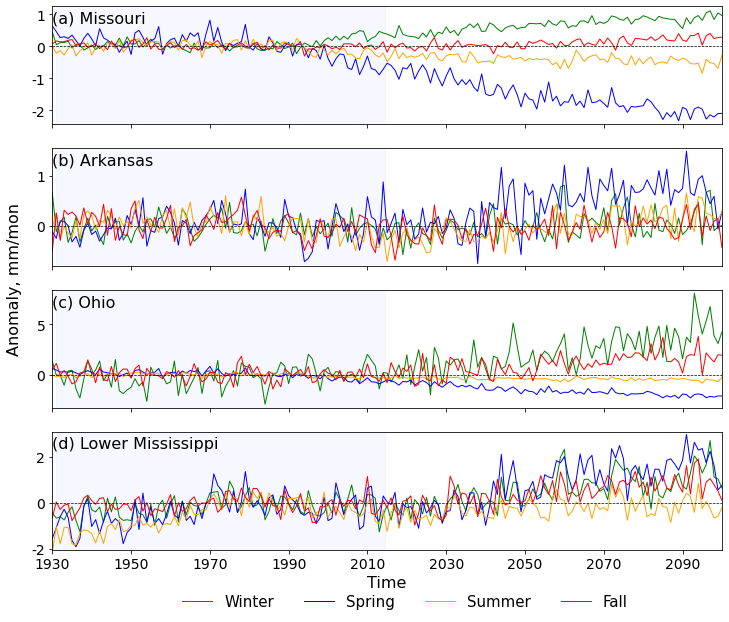

In [105]:
#%matplotlib notebook


tickFontSize = 14
textFontSize = 16
legendFontSize = 15
titleFontSize = 16

linewidth = 0.8
dashLinewidth = 0.7

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
fig = plt.figure(figsize=(12, 10), constrained_layout=False)
axs = [plt.subplot(4, 1, x + 1,) for x in range(4)]
ax1 = axs[0]

ln12=ax1.plot(range(171), param_winterAnom_Missouri, label="Winter", color = 'green', linestyle='-', linewidth=1.0)
ln13=ax1.plot(range(171), param_springAnom_Missouri, label="Spring", color = 'blue', linestyle='-', linewidth=1.0)
ln14=ax1.plot(range(171), param_summerAnom_Missouri, label="Summer", color = 'orange', linestyle='-', linewidth=1.0)
ln15=ax1.plot(range(171), param_fallAnom_Missouri, label="Fall", color = 'red', linestyle='-', linewidth=1.0)
ln16=ax1.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)
ln17=ax1.axvspan(1, 84.5, color='b',alpha=0.03)

ax1.set_title('(a) Missouri', y=0.98, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++
ax1.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax1.set_xticks(timeTicks)
ax1.set_xticklabels('', )

ax1.set_xlim([0, 170])
ax1.set_ylim([-2.45, 1.25])

ax1.set_yticks([-2, -1, 0, 1]) 
ax1.set_yticklabels(['-2', '-1', '0', '1'],  fontsize = tickFontSize) 
#+++++++++++++++++++++++++++++++++++++

ax2 = axs[1]
ln22=ax2.plot(range(171), param_winterAnom_Arkansas, label="Winter", color = 'green', linestyle='-', linewidth=1.0)
ln23=ax2.plot(range(171), param_springAnom_Arkansas, label="Spring", color = 'blue', linestyle='-', linewidth=1.0)
ln24=ax2.plot(range(171), param_summerAnom_Arkansas, label="Summer", color = 'orange', linestyle='-', linewidth=1.0)
ln25=ax2.plot(range(171), param_fallAnom_Arkansas, label="Fall", color = 'red', linestyle='-', linewidth=1.0)
ln26=ax2.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)
ln27=ax2.axvspan(1, 84.5, color='b',alpha=0.03)

ax2.set_title('(b) Arkansas', y=0.98, pad=-14, fontsize = textFontSize, loc='left')
ax2.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax2.set_xticks(timeTicks)
ax2.set_xticklabels('', )

ax2.set_xlim([0, 170])
ax2.set_ylim([-0.8, 1.55])

ax2.set_yticks([0, 1]) 
ax2.set_yticklabels(['0', '1'],  fontsize = tickFontSize) 

ax2.set_ylabel('Anomaly, mm/mon', fontsize = textFontSize)

ax2.yaxis.set_label_coords(-.045, -.1)
#+++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++

ax3 = axs[2]
ln32=ax3.plot(range(171), param_winterAnom_Ohio, label="Winter", color = 'green', linestyle='-', linewidth=1.0)
ln33=ax3.plot(range(171), param_springAnom_Ohio, label="Spring", color = 'blue', linestyle='-', linewidth=1.0)
ln34=ax3.plot(range(171), param_summerAnom_Ohio, label="Summer", color = 'orange', linestyle='-', linewidth=1.0)
ln35=ax3.plot(range(171), param_fallAnom_Ohio, label="Fall", color = 'red', linestyle='-', linewidth=1.0)
ln36=ax3.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)
ln37=ax3.axvspan(1, 84.5, color='b',alpha=0.03)

ax3.set_title('(c) Ohio', y=0.98, pad=-14, fontsize = textFontSize, loc='left')
ax3.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax3.set_xticks(timeTicks)
ax3.set_xticklabels('', )

ax3.set_xlim([0, 170])
ax3.set_ylim([-3.3, 8.4])

ax3.set_yticks([0, 5]) 
ax3.set_yticklabels(['0', '5'],  fontsize = tickFontSize) 
ax3.legend(ncol=4, loc=(+0.185, -1.75),frameon=False, fontsize=legendFontSize)
#+++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++

ax4 = axs[3]
ln42=ax4.plot(range(171), param_winterAnom_lowMissi, label="Winter", color = 'green', linestyle='-', linewidth=1.0)
ln43=ax4.plot(range(171), param_springAnom_lowMissi, label="Spring", color = 'blue', linestyle='-', linewidth=1.0)
ln44=ax4.plot(range(171), param_summerAnom_lowMissi, label="Summer", color = 'orange', linestyle='-', linewidth=1.0)
ln45=ax4.plot(range(171), param_fallAnom_lowMissi, label="Fall", color = 'red', linestyle='-', linewidth=1.0)
ln46=ax4.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)
ln47=ax4.axvspan(1, 84.5, color='b',alpha=0.03)

ax4.set_title('(d) Lower Mississippi', y=0.98, pad=-14, fontsize = textFontSize, loc='left')

ax4.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax4.set_xticks(timeTicks)
ax4.set_xticklabels(timeTickLebels, minor=False, rotation=0, fontsize = tickFontSize)

ax4.set_xlim([0, 170])
ax4.set_ylim([-2.05, 3.1])

ax4.set_yticks([-2, 0, 2]) 
ax4.set_yticklabels(['-2', '0', '2'],  fontsize = tickFontSize) 

ax4.set_xlabel('Time', fontsize = textFontSize)

#+++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++

plt.show()

#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\runoff\seasonal\runoffSeasonalAnomTs.pdf') 
#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\runoff\seasonal\runoffSeasonalAnomTs.png', dpi=600)  




In [106]:
STOP here ===========

SyntaxError: invalid syntax (<ipython-input-106-665768e7338e>, line 1)